In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from pprint import pprint

from api_keys import weather_api_key
from citipy import citipy

In [18]:
lat_range = (-90, 90)
lng_range = (-180, 180)

In [19]:
lat_lngs = []
cities = []

In [20]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [21]:
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

city = zip(cities)
print(cities)

['hilo', 'orangeburg', 'hermanus', 'olafsvik', 'ketchikan', 'tasiilaq', 'leningradskiy', 'saldanha', 'saint-pierre', 'karratha', 'husavik', 'puerto ayora', 'san cristobal', 'sorong', 'halalo', 'hithadhoo', 'barentsburg', 'mahebourg', 'ahwa', 'bluff', 'punta arenas', 'carbonia', 'candolim', 'dunedin', 'faanui', 'ushuaia', 'marystown', 'carnarvon', 'girne', 'narsaq', 'kodiak', 'victoria', 'pisco', 'anadyr', 'mataura', 'busselton', 'hobart', 'illoqqortoormiut', 'pakxe', 'bengkulu', 'praia da vitoria', 'atar', 'dikson', 'klaksvik', 'alyangula', 'torbay', 'coquimbo', 'nikolskoye', 'tuktoyaktuk', 'belaya gora', 'broome', 'barrow', 'cape town', 'albany', 'arraial do cabo', 'tombouctou', 'jamestown', 'ribeira grande', 'barra do garcas', 'kapaa', 'coihaique', 'blagoyevo', 'rikitea', 'bongandanga', 'falealupo', 'road town', 'koungou', 'norman wells', 'visnes', 'alotau', 'chokurdakh', 'machachi', 'taolanaro', 'amderma', 'chuy', 'kokopo', 'baykit', 'olot', 'belushya guba', 'el limon', 'puerto del 

In [22]:
print(len(cities))

584


In [23]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [24]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found")

print("Complete")

Record 1 of Set 1 : hilo
Record 2 of Set 1 : orangeburg
Record 3 of Set 1 : hermanus
Record 4 of Set 1 : olafsvik
Record 5 of Set 1 : ketchikan
Record 6 of Set 1 : tasiilaq
Record 7 of Set 1 : leningradskiy
Record 8 of Set 1 : saldanha
Record 9 of Set 1 : saint-pierre
Record 10 of Set 1 : karratha
Record 11 of Set 1 : husavik
Record 12 of Set 1 : puerto ayora
Record 13 of Set 1 : san cristobal
Record 14 of Set 1 : sorong
City not found
Record 15 of Set 1 : hithadhoo
City not found
Record 16 of Set 1 : mahebourg
Record 17 of Set 1 : ahwa
Record 18 of Set 1 : bluff
Record 19 of Set 1 : punta arenas
Record 20 of Set 1 : carbonia
Record 21 of Set 1 : candolim
Record 22 of Set 1 : dunedin
Record 23 of Set 1 : faanui
Record 24 of Set 1 : ushuaia
Record 25 of Set 1 : marystown
Record 26 of Set 1 : carnarvon
Record 27 of Set 1 : girne
Record 28 of Set 1 : narsaq
Record 29 of Set 1 : kodiak
Record 30 of Set 1 : victoria
Record 31 of Set 1 : pisco
Record 32 of Set 1 : anadyr
Record 33 of Set 1 :

In [25]:
weather = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [26]:
weather.count()

City          548
Cloudiness    548
Country       548
Date          548
Humidity      548
Lat           548
Lng           548
Max Temp      548
Wind Speed    548
dtype: int64

In [27]:
weather

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hilo,90,US,1610938872,78,19.7297,-155.0900,77.00,6.91
1,Orangeburg,1,US,1610939231,87,33.4918,-80.8557,37.00,7.56
2,Hermanus,12,ZA,1610939024,82,-34.4187,19.2345,66.00,5.99
3,Olafsvik,99,IS,1610938794,92,64.8945,-23.7142,34.56,12.53
4,Ketchikan,90,US,1610939231,100,55.3422,-131.6461,42.80,8.05
...,...,...,...,...,...,...,...,...,...
543,Seoul,75,KR,1610938772,80,37.5683,126.9778,32.00,5.75
544,Diplo,0,PK,1610939323,23,24.4667,69.5840,62.44,10.09
545,Blythe,1,US,1610939323,15,33.6103,-114.5964,62.60,3.44
546,Canala,90,NC,1610939323,79,-21.5333,165.9500,84.20,6.91


In [28]:
weather.to_csv("cities.csv", index = False)

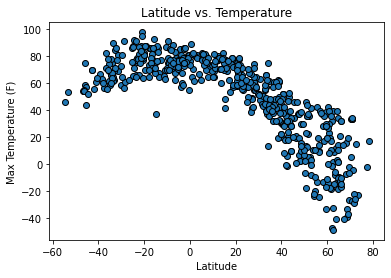

In [29]:
plt.scatter(weather["Lat"], weather["Max Temp"], edgecolor = "black")
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Latitude vs Temperature.png")
#The following code and graph is measuring Temperature in Fahrenheit on the y-axis and Latitude on the x-axis;
#Overall, as the latitude increases the max temperature decreases

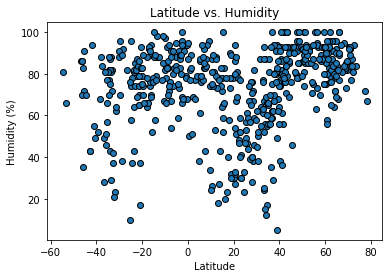

In [30]:
plt.scatter(weather["Lat"], weather["Humidity"], edgecolor = "black")
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Latitude vs Humidity.png")
#The following code and graph is measuring Humidity percent on the y-axis and Latitude on the x-axis;
#There is a higher humidity percent greater than zero latitude than less than zero latitude

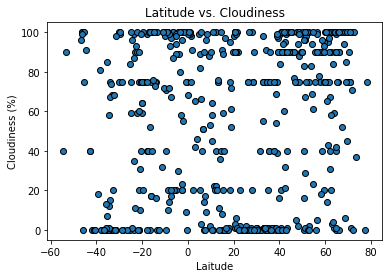

In [31]:
plt.scatter(weather["Lat"], weather["Cloudiness"], edgecolor = "black")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Latitude vs Cloudiness.png")
#The following code and graph is measuring Cloudiness as a percent on the y-axis and Latitude on the x-axis;
#There are several cities along the extremes (zero & 100 %) of cloudiness percent with varying latitudes

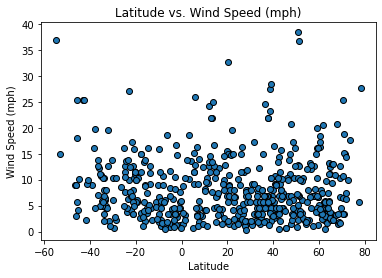

In [33]:
plt.scatter(weather["Lat"], weather["Wind Speed"], edgecolor = "black")
plt.title("Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Latitude vs Wind Speed(mph).png")
#The following code and graph is measuring Wind Speed in miles per hour y-axis and Latitude on the x-axis;
#The majority of data points are less than 20 mph